### Bài 1: Sử dụng Numpy xây dựng phương pháp Logistic Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\DS102\Thực hành\DS102\lab-2\data.csv", sep = ";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

#### Chuẩn hóa data

In [4]:
def encoder_target(value: str)-> int:
    if value == "Enrolled" or value == "Dropout": #non-graduate
        return 0
    if value == "Graduate": #graduate
        return 1

In [5]:
df["Target"] = df["Target"].apply(encoder_target)

In [6]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [7]:
#Get continuous
continuous_features = []
for col in df.columns:
    if df[col].dtype == 'float64':
        continuous_features.append(col)

print(len(continuous_features))
continuous_features

7


['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [8]:
normalized_data = df.copy()

for col in continuous_features:
    normalized_data[col] = (normalized_data[col] - normalized_data[col].mean()) / normalized_data[col].std()

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,1
4420,1,1,2,9773,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,9500,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,9147,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,1


In [9]:

course_dict = {}
i = 0

for id in normalized_data['Course'].unique():
    course_dict.update({id : i})
    i += 1

def convert_coures_id(id: int) -> int:
    return course_dict[id]

normalized_data['Course'] = normalized_data['Course'].apply(convert_coures_id)

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,1
4420,1,1,2,3,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,6,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,13,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,1


### Logistic Regression

In [10]:
from logging import logProcesses
from tqdm import tqdm

class LogisticRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []

  def sigmoid(self, x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

  def loss_function(self, y : np.ndarray, y_pre : np.ndarray) -> float:
        return -(y * np.log(y_pre + 1e-6) + (1-y)* np.log(1-y_pre + 1e-6)).mean()

  def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
    return 1 - np.mean(np.abs(y - y_hat))

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    n = X.shape[0]
    d = X.shape[1]
    self.theta = np.zeros((d, 1))
    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        #forward
        pb.set_description(f"Epoch: {e+1}")
        y_hat = self.predict(X)
        #backward
        diff = y_hat - y.reshape(-1, 1) # Changed this line to directly reshape y
        gradient = 1/n * np.matmul(X.T, diff)
        self.theta = self.theta - self.lr * gradient
        #evaluating
        y_hat = self.predict(X)
        loss = self.loss_function(y, y_hat)
        acc = self.accuracy(y, y_hat)
        pb.set_postfix({"loss": loss, "acc": acc})

        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.ndarray:
    z = np.matmul(X, self.theta)
    y_hat = self.sigmoid(z)
    return y_hat


In [11]:
# Split data into train and test set
data = normalized_data.to_numpy()

data_train, data_test = np.split(data, indices_or_sections=[int(0.8*data.shape[0])])

X_train = data_train[:,:36]
Y_train = data_train[:,36 : ]

X_test = data_test[:,:36]
Y_test = data_test[:,36 : ]

In [18]:
logistic_reg =  LogisticRegression(epoch=1000, lr=0.0001)
logistic_reg.fit(X_train, Y_train)

Epoch: 1000: 100%|██████████| 1000/1000 [00:05<00:00, 175.43it/s, loss=0.567, acc=0.584]


In [14]:
# Evaluate model by using accuracy metric
predicted = logistic_reg.predict(X_test)
print('Accuracy: ',logistic_reg.accuracy(Y_test, predicted))

Accuracy:  0.5808594800882937


### Visualize the loss function

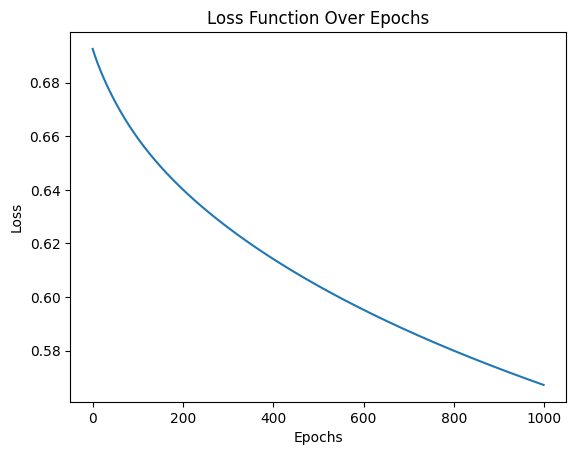

In [15]:
plt.plot(range(len(logistic_reg.losses)), logistic_reg.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Function Over Epochs")
plt.show()